## Задания по Pandas


In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

Задания выполняются с датасетом Pima Indian Diabetes - это данные из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является прогнозирование наличия диабета у пациента. Все пациенты в приведенной выборке - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - наличие диабета у субъекта, выражена 0 (здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

В загруженных данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов.

Для тех переменных, в которых есть пропуски, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [4]:
# решение (количество строк, столбцов)
print(data.shape)

(768, 9)


In [5]:
missing_data = data.isnull()
missing_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Pregnancies
Pregnancies
False    768
Name: count, dtype: int64
 
Glucose
Glucose
False    763
True       5
Name: count, dtype: int64
 
BloodPressure
BloodPressure
False    733
True      35
Name: count, dtype: int64
 
SkinThickness
SkinThickness
False    541
True     227
Name: count, dtype: int64
 
Insulin
Insulin
False    394
True     374
Name: count, dtype: int64
 
BMI
BMI
False    757
True      11
Name: count, dtype: int64
 
DiabetesPedigreeFunction
DiabetesPedigreeFunction
False    768
Name: count, dtype: int64
 
Age
Age
False    768
Name: count, dtype: int64
 
Class
Class
False    768
Name: count, dtype: int64
 


In [6]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

In [7]:
data[['Glucose']].isnull().sum()



Glucose    5
dtype: int64

In [50]:
data[['BloodPressure']].isnull().sum()

BloodPressure    35
dtype: int64

In [51]:
data[['SkinThickness']].isnull().sum()

SkinThickness    227
dtype: int64

In [52]:
data[['Insulin']].isnull().sum()

Insulin    374
dtype: int64

In [53]:
data[['BMI']].isnull().sum()

BMI    11
dtype: int64

In [8]:
isnull_Glucose = data[['Glucose']].isnull().sum()
isnull_BloodPressure = data[['BloodPressure']].isnull().sum()
isnull_SkinThickness = data[['SkinThickness']].isnull().sum()
isnull_Insulin = data[['Insulin']].isnull().sum()
isnull_BMI = data[['BMI']].isnull().sum()
#print("В переменной {Glucose}"{isnull_Glucose}"пропущенных значений")

In [95]:
print(f"Пропущенных значений в переменной {isnull_Glucose}")
print(f"Пропущенных значений в переменной {isnull_BloodPressure}")
print(f"Пропущенных значений в переменной {isnull_SkinThickness}")
print(f"Пропущенных значений в переменной {isnull_Insulin}")
print(f"Пропущенных значений в переменной {isnull_BMI}")

Пропущенных значений в переменной Glucose    5
dtype: int64
Пропущенных значений в переменной BloodPressure    35
dtype: int64
Пропущенных значений в переменной SkinThickness    227
dtype: int64
Пропущенных значений в переменной Insulin    374
dtype: int64
Пропущенных значений в переменной BMI    11
dtype: int64


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

Glucose


In [9]:
data[data['Glucose'].isnull()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [10]:
data['Glucose'].median()

np.float64(117.0)

In [11]:
data['Glucose_Median'] = data['Glucose'].fillna(data['Glucose'].median())


In [12]:
data[data['Glucose'].isnull()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Glucose_Median
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0,117.0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0,117.0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0,117.0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1,117.0
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1,117.0


In [ ]:
#data.head()

BloodPressure

In [188]:
data[data['BloodPressure'].isnull()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,column,Glucose_Median,BloodPressure_Median
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,1,115.0,72.0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1,1,100.0,72.0
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0,1,105.0,72.0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0,1,84.0,72.0
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1,1,131.0,72.0


In [184]:
data['BloodPressure'].median()

np.float64(72.0)

In [185]:
data['BloodPressure_Median'] = data['BloodPressure'].fillna(data['BloodPressure'].median())

In [189]:
data[data['BloodPressure'].isnull()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,column,Glucose_Median,BloodPressure_Median
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,1,115.0,72.0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1,1,100.0,72.0
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0,1,105.0,72.0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0,1,84.0,72.0
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1,1,131.0,72.0


SkinThickness

In [187]:
data[data['SkinThickness'].isnull()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,column,Glucose_Median,BloodPressure_Median
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1,183.0,64.0
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,1,116.0,74.0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,1,115.0,72.0
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,1,125.0,96.0
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0,1,110.0,92.0


In [190]:
data['SkinThickness'].median()

np.float64(29.0)

In [191]:
data['SkinThickness_Median'] = data['SkinThickness'].fillna(data['SkinThickness'].median())

In [192]:
data[data['SkinThickness'].isnull()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,column,Glucose_Median,BloodPressure_Median,SkinThickness_Median
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1,183.0,64.0,29.0
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,1,116.0,74.0,29.0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,1,115.0,72.0,29.0
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,1,125.0,96.0,29.0
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0,1,110.0,92.0,29.0


Insulin

In [ ]:
data[data['Insulin'].isnull()].head()

In [194]:
data['Insulin'].median()

np.float64(125.0)

In [195]:
data['Insulin_Median'] = data['Insulin'].fillna(data['Insulin'].median())

In [ ]:
data[data['Insulin'].isnull()].head()

BMI

In [ ]:
data[data['BMI'].isnull()].head()

In [198]:
data['BMI'].median()

np.float64(32.3)

In [199]:
data['BMI_Median'] = data['BMI'].fillna(data['BMI'].median())

In [200]:
data[data['BMI'].isnull()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,column,Glucose_Median,BloodPressure_Median,SkinThickness_Median,Insulin_Median,BMI_Median
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,1,125.0,96.0,29.0,125.0,32.3
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0,1,105.0,72.0,29.0,125.0,32.3
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0,1,84.0,72.0,29.0,125.0,32.3
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0,1,74.0,72.0,29.0,125.0,32.3
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0,1,102.0,75.0,23.0,125.0,32.3


__Задание 3.__

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [34]:
data.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Glucose_Median
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958,121.656250
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951,30.438286
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,44.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000,99.750000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,117.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000,140.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [14]:
data[data.Age > 50].shape[0]
# Кол-во женщин старше 50 лет - 81

81

In [15]:
data[data.Class == 1].shape[0]
# Диабет обнаружен у 268 женщин

268

In [16]:
# решение
data[(data.Class == 1) & (data.Age > 50)].shape[0]
# У 38 женщин старше 50лет обнаружен диабет

38

__Задание 5.__

Найдите трех женщин с наибольшими числом беременностей.

In [17]:
# решение
data.nlargest(3, ['Pregnancies']) 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,Glucose_Median
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1,163.0
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1,136.0
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1,100.0


__Задание 6.__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [19]:
# решение
data[(data.Pregnancies >= 3) & (data.Age < 30)].shape[0]

117

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [20]:
data[(data.BloodPressure > 80)&(data.BloodPressure < 89)].shape[0]
# Определение нормального давления

105

In [35]:
normal_pressure_count = data[(data.BloodPressure > 80)&(data.BloodPressure < 89)].shape[0]
## Количество женщин с нормальным давлением

In [23]:
total_women_count = 768
# Количество женщин всего

In [36]:
percentage_normal_pressure_women = (normal_pressure_count / total_women_count) * 100
print(f'Процент женщин с нормальным давлением: {percentage_normal_pressure_women:.2f} %')

Процент женщин с нормальным давлением: 13.67 %


In [ ]:
#total = data[(data.BloodPressure > 80)&(data.BloodPressure < 89)]
#percentage = (data.BloodPressure / total) * 100
#print(percentage)

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [25]:
# решение
data[(data.BMI >= 30)].shape[0]
# У 472 женщин ожирение

472

In [26]:
data[(data.BloodPressure >= 89)].shape[0]
# У 60 женщин кровяное давление выше среднего

60

In [37]:
data[(data.BMI >= 30)&(data.BloodPressure >= 89)].shape[0]
#У 44 женщин с признаками ожирения кровяное давление выше среднего 

44

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [30]:
# решение
data.groupby('Class')['Glucose'].mean()

Class
0    110.643863
1    142.319549
Name: Glucose, dtype: float64

In [31]:
# решение
data.groupby('Class')['BloodPressure'].mean()

Class
0    70.877339
1    75.321429
Name: BloodPressure, dtype: float64

In [32]:
# решение
data.groupby('Class')['Insulin'].mean()


Class
0    130.287879
1    206.846154
Name: Insulin, dtype: float64

__Задание 10.__

Постройте круговую диаграмму для признака __Class__.

<Axes: >

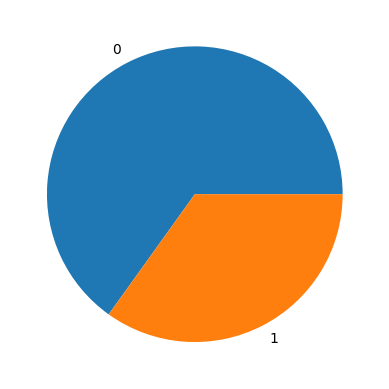

In [33]:
# решение
data.groupby('Class').size().plot(kind = 'pie')

__Задание 11.__

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

Постройте нормальное распределение поверх графика.

C:\Users\79040\AppData\Local\Temp\ipykernel_10308\2955802447.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BMI.dropna()) # применяем функцию, которая строит график распределения из библиотеки seaborn к нашим данным.


<Axes: xlabel='BMI', ylabel='Density'>

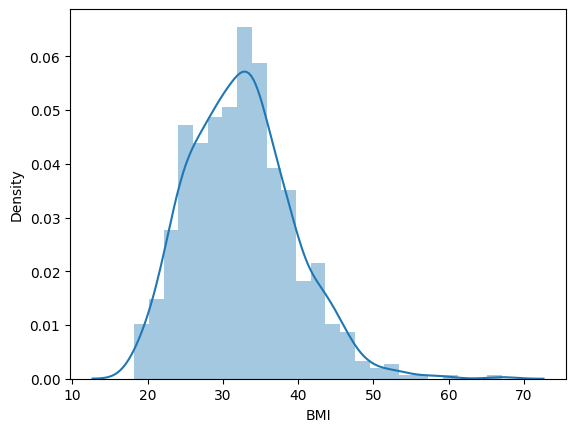

In [38]:
sns.distplot(data.BMI.dropna()) # применяем функцию, которая строит график распределения из библиотеки seaborn к нашим данным.
                                 # методом .dropna() опускаем ячейки с пропущенными значениями - иначе seaborn сломается.

C:\Users\79040\AppData\Local\Temp\ipykernel_12084\1314678956.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BMI.dropna(), fit=norm)  # параметр fit строит нам еще один график поверх существующего,


<Axes: xlabel='BMI', ylabel='Density'>

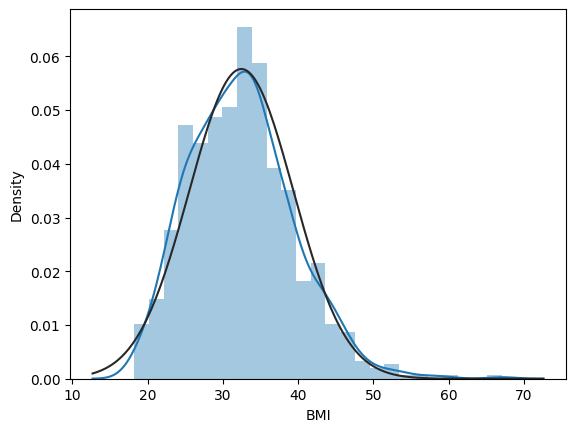

In [33]:
# из пакета для работы со статистическими данными и моделями импортируем команду, которая задает нормальное распределение
from scipy.stats import norm

sns.distplot(data.BMI.dropna(), fit=norm)  # параметр fit строит нам еще один график поверх существующего,
                                           # сейчас мы просим его построить нормальное распределение

## Вывод
На графике представлено распределение значений BMI и его сравнение с нормальным распределением. 

1. **Форма распределения**: Распределение BMI может быть скошенным или иметь разные пики, что указывает на отклонения от нормальности.
2. **Сравнение с нормальным распределением**: Если красная кривая нормального распределения хорошо совпадает с формой гистограммы, это говорит о том, что значения BMI распределены близко к нормальному. Если наблюдаются значительные расхождения, это может указывать на наличие подгрупп или аномальных значений в данных.
3. **Интерпретация**: Анализое распределение помогает понять, насколько нормально распределены значения BMI в популяции. Если распределение значительно отличается от нормального, это может иметь последствия для здоровья и подходов к лечению.

В дальнейшем анализе стоит рассмотреть влияние различных факторов на распределение BMI, например, возраст, пол и уровень физической активности.

<Axes: xlabel='BMI', ylabel='Density'>

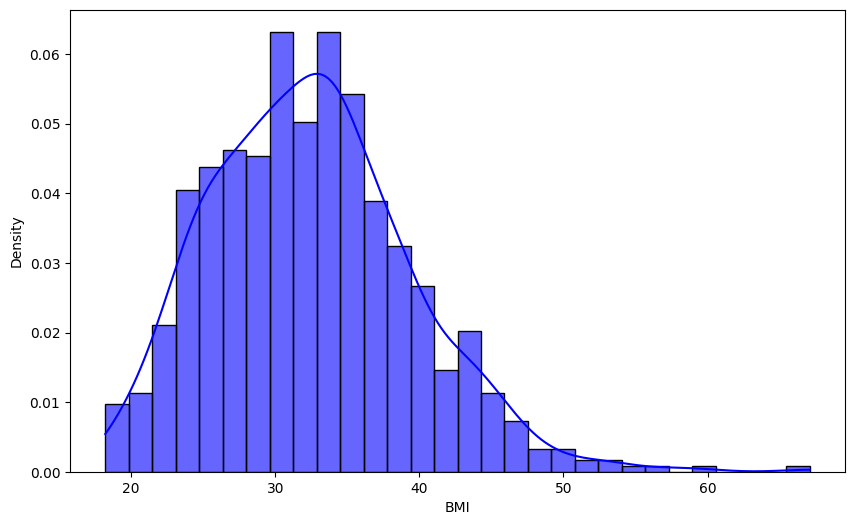

In [31]:
# Загрузка датасета
#df  = pd.read_csv('pima-indians-diabetes.csv')

# Построение гистограммы для BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, stat="density", color='blue', label='BMI', alpha=0.6)

__Задание 12.__
Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.


In [39]:

# Данные: число беременностей и соответствующий процент больных диабетом
number_of_pregnancies = 768  #Число беременностей
diabetic_percentage = percentage_diabetes_women
#Процент больных

# Создание графика
plt.figure(figsize=(10, 5))
plt.plot(number_of_pregnancies, diabetic_percentage, marker='o')

# Настройка графика
plt.title('Процент больных диабетом в зависимости от числа беременностей')
plt.xlabel('Число беременностей')
plt.ylabel('Процент больных диабетом (%)')
#plt.xticks(number_of_pregnancies)
plt.grid()
# Показать график
plt.show()

NameError: name 'percentage_diabetes_women' is not defined

In [41]:
# число беременных
data['Pregnancies'].shape[0]
#data[(data.BMI >= 30)&(data.BloodPressure >= 89)].shape

768

In [42]:
data[data.Class == 1].shape[0]
#кол-во женщин, которые больны диабетом

268

In [43]:
diabetes_count = data[data.Class == 1].shape[0]

In [ ]:
total_women_count = 768
#кол-во всех женщин

In [48]:
percentage_diabetes_women = (diabetes_count / total_women_count) * 100
print(f'Процент женщин больных диабетом: {percentage_diabetes_women:.2f}%')

Процент женщин больных диабетом: 34.90%


In [ ]:
data.groupby('Pregnancies').sum()

In [55]:
data.Pregnancies.value_counts()
#Число беременностей

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [56]:
import matplotlib.pyplot as plt

In [80]:
число_беременностей = 768
процент_диабета = 34.90

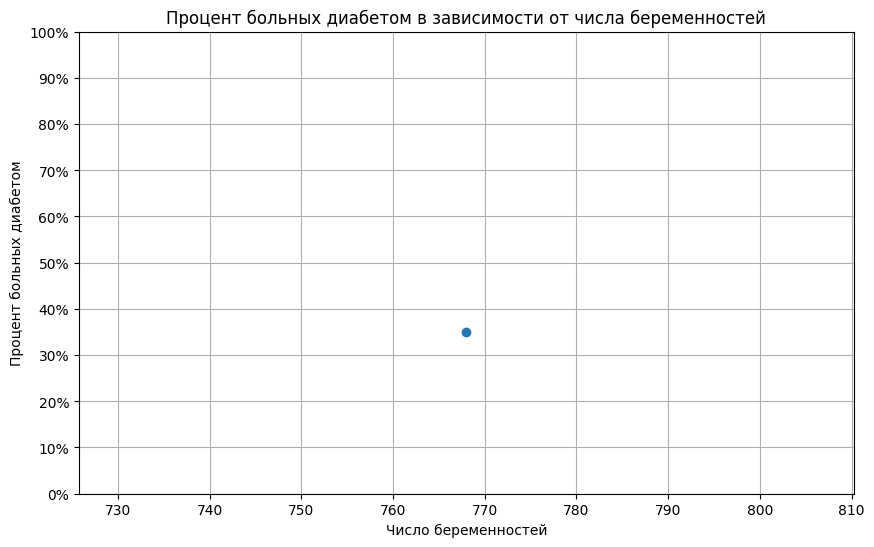

In [97]:
plt.figure(figsize=(10, 6))
plt.plot( число_беременностей, процент_диабета, marker='o')
plt.title('Процент больных диабетом в зависимости от числа беременностей')
plt.xlabel('Число беременностей')
plt.ylabel('Процент больных диабетом')
plt.gca().set_yticks(range(0, 101, 10))
plt.gca().set_yticklabels([f'{i}%' for i in range(0, 101, 10)])
plt.grid()
plt.xticks()
plt.yticks(range(0, 101, 10))
plt.show()

__Задание 13.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [44]:
# решение
# Добавление нового бинарного признака wasPregnant
data['wasPregnant'] = data['Pregnancies'].apply(lambda x: 1 if x > 0 else 0)
print(data)
# 1 - Беременна, 0 - Не беременна

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Class  Glucose_Median  wasPregnant  
0                       0.627   50    

__Задание 14.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [45]:
# решение
data[(data.wasPregnant == 1)].shape
#Кол-во беременных 657

(657, 11)

In [126]:
data[(data.wasPregnant == 1)&(data.Class == 1)].shape
#Кол-во беременных с диабетом 230

(230, 11)

Процент больных диабетом среди беременных = (Количество беременных с диабетом / Общее количество беременных) * 100

In [128]:
total_pregnant_women = 657  # Общее количество беременных женщин
diabetic_pregnant_women = 230  # Количество беременных женщин с диабетом

# Расчет процента больных диабетом среди беременных
if total_pregnant_women > 0:
    diabetic_percentage = (diabetic_pregnant_women / total_pregnant_women) * 100
else:
    diabetic_percentage = 0

print(f"Процент больных диабетом среди беременных: {diabetic_percentage:.2f}%")


Процент больных диабетом среди беременных: 35.01%


Процент больных диабетом среди небеременных = (Количество небеременных с диабетом / Общее количество небеременных) * 100

In [129]:
data[(data.wasPregnant == 0)].shape
#Кол-во не беременных 111

(111, 11)

In [ ]:
data[(data.wasPregnant == 0)&(data.Class == 1)].shape
#Кол-во небеременных с диабетом 38

(38, 11)

In [131]:
total_non_pregnant_women = 111  # Общее количество небеременных женщин
diabetic_non_pregnant_women = 38  # Количество небеременных женщин с диабетом

# Расчет процента больных диабетом среди небеременных
if total_non_pregnant_women > 0:
    diabetic_percentage = (diabetic_non_pregnant_women / total_non_pregnant_women) * 100
else:
    diabetic_percentage = 0

print(f"Процент больных диабетом среди небеременных: {diabetic_percentage:.2f}%")

Процент больных диабетом среди небеременных: 34.23%


__Задание 15.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [46]:
# решение
# Функция для определения типа тела на основе BMI
def determine_body_type(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

# Добавление нового категориального признака bodyType
data['bodyType'] = data['BMI'].apply(determine_body_type)

print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Class  Glucose_Median  wasPregnant  \
0                       0.627   50   

__Задание 16.__

Какой процент женщин с нормальными показателями веса и давления больны диабетом?

In [ ]:
# решение
data[(data.BloodPressure > 80)&(data.BloodPressure < 89)].shape[0]

105

In [48]:
# Определяем условия
normal_weight = (data.BMI < 25)
normal_pressure = data[(data.BloodPressure > 80)&(data.BloodPressure < 89)]

In [ ]:
# Фильтруем женщин с нормальными показателями
normal_woman=data[(data.BMI < 25)&(data.BloodPressure > 80)&(data.BloodPressure < 89)].shape[0]

In [76]:

data[data.Class == 1].shape
diabetes_woman=data[data.Class == 1].shape[0]
print(diabetes_woman)
#Кол-во женщин больных диабетом

268


Процент = (Количество женщин с диабетом / Общее количество женщин с нормальными показателями) * 100

In [ ]:
# Рассчитываем процент
percentage = (diabetes_woman/normal_woman) * 100
print(f'Процент женщин с нормальными показателями веса и давления, больных диабетом: {percentage:.2f}%')

Процент женщин с нормальными показателями веса и давления, больных диабетом: 6700.00%
